## Code submitted by: Chirag Verma

### Prob 3a
Polynomial in hand: $a^3 + a - \gamma = 0$
TO classify the stability of its roots on the basis of the value of the determinant calculated in the following cells

In [1]:
import numpy as np

# Varying gamma from 0 to 10
gamma = list(np.arange(0, 5, 0.1))

# initializing a list for coeffients
coeff = list(np.zeros((len(gamma))))

# Storing the coefficients of the polynomial in the list
for i in range(len(coeff)):
    coeff[i] = [1, 0, 1, -gamma[i]]
    
# Calculating the roots of the polynomial
roots = list(np.zeros(len(gamma)))

for i in range(len(coeff)):
    roots[i] = np.roots(coeff[i])
    print("for gamma = ", np.round(gamma[i], 2), ", the roots are: ", np.round(roots[i], 2))

# The third root for a given index is always real


for gamma =  0.0 , the roots are:  [-0.+1.j  0.-1.j  0.+0.j]
for gamma =  0.1 , the roots are:  [-0.05+1.j -0.05-1.j  0.1 +0.j]
for gamma =  0.2 , the roots are:  [-0.1 +1.01j -0.1 -1.01j  0.19+0.j  ]
for gamma =  0.3 , the roots are:  [-0.14+1.03j -0.14-1.03j  0.28+0.j  ]
for gamma =  0.4 , the roots are:  [-0.18+1.05j -0.18-1.05j  0.36+0.j  ]
for gamma =  0.5 , the roots are:  [-0.21+1.07j -0.21-1.07j  0.42+0.j  ]
for gamma =  0.6 , the roots are:  [-0.24+1.08j -0.24-1.08j  0.49+0.j  ]
for gamma =  0.7 , the roots are:  [-0.27+1.1j -0.27-1.1j  0.54+0.j ]
for gamma =  0.8 , the roots are:  [-0.3 +1.12j -0.3 -1.12j  0.59+0.j  ]
for gamma =  0.9 , the roots are:  [-0.32+1.14j -0.32-1.14j  0.64+0.j  ]
for gamma =  1.0 , the roots are:  [-0.34+1.16j -0.34-1.16j  0.68+0.j  ]
for gamma =  1.1 , the roots are:  [-0.36+1.18j -0.36-1.18j  0.72+0.j  ]
for gamma =  1.2 , the roots are:  [-0.38+1.2j -0.38-1.2j  0.76+0.j ]
for gamma =  1.3 , the roots are:  [-0.4+1.21j -0.4-1.21j  0.8+0.j  ]
for g

In [2]:
# finding the value of the determinant for the real root thus obtained
det = 0

for i in range(len(coeff)):
    det = 1 - (4*gamma[i]**2*roots[i][2])/(1+ roots[i][2]**2)**2
    print("for gamma = ", np.round(gamma[i], 2), ", the determinant is: ", np.real(np.round(det, 2)))

# The determinant changes its sign after some critical gamma = 2
# Hence, the nature of the fixed point changes!

for gamma =  0.0 , the determinant is:  1.0
for gamma =  0.1 , the determinant is:  1.0
for gamma =  0.2 , the determinant is:  0.97
for gamma =  0.3 , the determinant is:  0.91
for gamma =  0.4 , the determinant is:  0.82
for gamma =  0.5 , the determinant is:  0.7
for gamma =  0.6 , the determinant is:  0.54
for gamma =  0.7 , the determinant is:  0.37
for gamma =  0.8 , the determinant is:  0.17
for gamma =  0.9 , the determinant is:  -0.04
for gamma =  1.0 , the determinant is:  -0.27
for gamma =  1.1 , the determinant is:  -0.51
for gamma =  1.2 , the determinant is:  -0.76
for gamma =  1.3 , the determinant is:  -1.02
for gamma =  1.4 , the determinant is:  -1.28
for gamma =  1.5 , the determinant is:  -1.56
for gamma =  1.6 , the determinant is:  -1.83
for gamma =  1.7 , the determinant is:  -2.12
for gamma =  1.8 , the determinant is:  -2.41
for gamma =  1.9 , the determinant is:  -2.7
for gamma =  2.0 , the determinant is:  -3.0
for gamma =  2.1 , the determinant is:  -3.3
for

### Prob 3b.
To plot: the flow field with the fixed points and their stability for different $\gamma$ and $n=2$

In [3]:
# Most of the following code has been adopted from the bifurcation generation code provided to us

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.linalg import eig

In [4]:
# Defining the model
def model(z, t, gamma):
    dadt = gamma/(1+z[1]**2) - z[0]
    dbdt = gamma/(1+z[0]**2) - z[1]    
    return [dadt, dbdt]

# Defining the jacobian of the model
def model_jac(z, t, gamma):
    dada = -1
    dadb = -(gamma/((1+z[1]**2)**2))*(2*z[1])
    dbda = -(gamma/((1+z[0]**2)**2))*(2*z[0])
    dbdb = -1
    
    return np.array([[dada,dadb],[dbda,dbdb]])


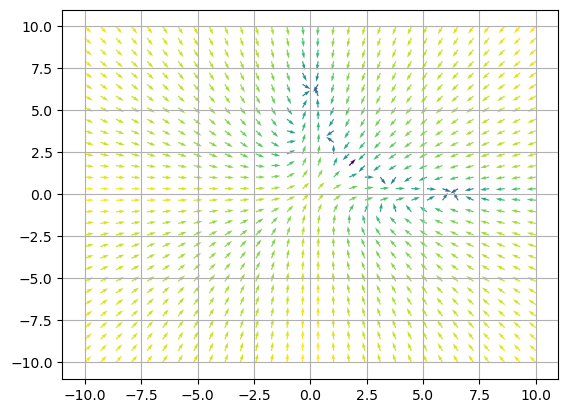

In [5]:
gamma = 7

samples = 30

x = np.linspace(-10, 10, samples)
y = np.linspace( -10, 10, samples)
X,Y = np.meshgrid(x, y)

DX,DY = model([X,Y], 0, gamma)
nrm = np.sqrt(DX**2 + DY**2)

plt.quiver(X, Y, DX/nrm, DY/nrm, np.log(nrm))
plt.grid()

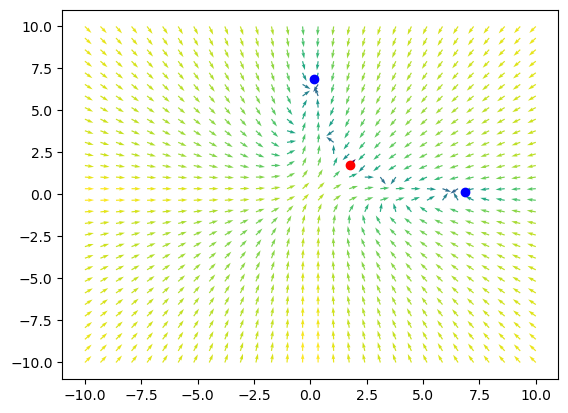

In [6]:
sol1 = root(model, [0.1, 7], jac = model_jac, args=(0,gamma))
sol2 = root(model, [1.5, 1.5], jac = model_jac, args=(0,gamma))
sol3 = root(model, [7, 0.1], jac = model_jac, args=(0,gamma))
plt.quiver(X, Y, DX/nrm, DY/nrm, np.log(nrm))
plt.scatter(*sol1.x, c='b')
plt.scatter(*sol2.x, c='r')
plt.scatter(*sol3.x, c='b')

$$G(b) := \left(\frac{\gamma}{1+b^2} \right)^2 - \frac{\gamma}{b} + 1 = 0$$

In [7]:
import ipywidgets as widgets
from IPython.display import HTML
from ipywidgets import interact, IntSlider, FloatSlider, Layout

style = {'description_width': '150px'}
slider_layout = Layout(width='99%')

def model_interactive(gamma = 2):
    
    samples = 25

    x = np.linspace(-10, 10, samples)
    y = np.linspace(-10, 10, samples)
    X,Y = np.meshgrid(x, y)

    DX,DY = model([X,Y], 0, gamma)
    nrm = np.sqrt(DX**2 + DY**2)
    
    sol1 = root(model, [0.1, 7], jac = model_jac, args=(0,gamma))
    sol2 = root(model, [1.5, 1.5], jac = model_jac, args=(0,gamma))
    sol3 = root(model, [7, 0.1], jac = model_jac, args=(0,gamma))  
    
    fig = plt.figure(figsize=(5,5))
    plt.quiver(X, Y, DX/nrm, DY/nrm, np.log(nrm))
    if sol1.success and sol2.success and sol3.success:
          plt.scatter(*sol1.x, c='b', s=60)
          plt.scatter(*sol2.x, c='r', s=60)
          plt.scatter(*sol3.x, c='b', s=60)
    
    plt.xlabel('a')
    plt.ylabel('b')
    
    plt.title(r'$\gamma$ = '+str(gamma))

    jac1 = model_jac(sol1.x, 0, gamma)
    jac2 = model_jac(sol2.x, 0, gamma)
    jac3 = model_jac(sol3.x, 0, gamma)

    ev1, evec1 = eig(jac1)
    ev2, evec2 = eig(jac2)
    ev3, evec3 = eig(jac3)

    print("ev1: ", np.round(ev1,2))
    print("ev2: ", np.round(ev2,2))
    print("ev3: ", np.round(ev3,2))
    
    print("real(ev1): ", np.round(np.real(ev1), 2))
    print("real(ev2): ", np.round(np.real(ev2), 2))
    print("real(ev3): ", np.round(np.real(ev3), 2))

    print("FP1 stable: ", all(np.real(ev1) < 0))
    print("FP2 stable: ", all(np.real(ev2) < 0))
    print("FP3 stable: ", all(np.real(ev3) < 0))

interact(model_interactive,
         gamma = FloatSlider(min=0, max=10, step=0.1, value=2, continuous_update=False, description='Parameter $\gamma$', style=style, layout=slider_layout),
         );

interactive(children=(FloatSlider(value=2.0, continuous_update=False, description='Parameter $\\gamma$', layou…

### Prob 3c
Generating bifurcation diagram as a function of gamma for n = 2

For n = 2
$$\dot{a} = \frac{\gamma}{1+b^2} - a$$
$$\dot{b} = \frac{\gamma}{1+a^2} - b$$

Text(0, 0.5, '$m = a-b$')

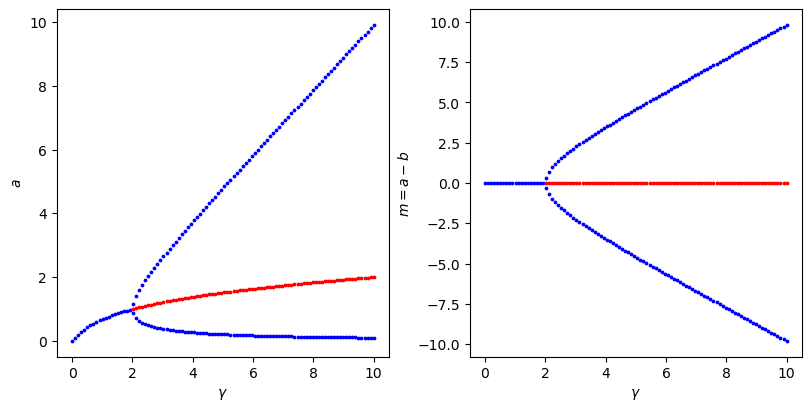

In [8]:
fig, ax = plt.subplots(1,2, figsize=(8,4),  constrained_layout = True)

root_samples = 6

x = np.linspace(-8, 8, root_samples)
y = np.linspace(-8, 8, root_samples)
X,Y = np.meshgrid(x, y)

for gamma_ in np.linspace(0,10,100):
    
    stable_roots = []
    unstbl_roots = []

    for x_current,y_current in np.nditer([X,Y]):
        
        sol = root(model, [x_current,y_current], jac = model_jac, args=(0,gamma_))
        
        if sol.success:
            
            jac = model_jac(sol.x, 0, gamma_)
            eigval, _ = eig(jac)
            stable = all(np.real(eigval) < 0)
            
            if stable:
                stable_roots.append(sol.x)
            else:
                unstbl_roots.append(sol.x)
    
    if stable_roots:        
        stable_roots = np.unique(np.around(np.vstack(stable_roots), 6), axis=0)
        ax[0].scatter(gamma_*np.ones(stable_roots.shape[0]), stable_roots[:,1], c='b', s=3)
        ax[1].scatter(gamma_*np.ones(stable_roots.shape[0]), stable_roots[:,0] - stable_roots[:,1], c='b', s=3)

    if unstbl_roots:
        unstbl_roots = np.unique(np.around(np.vstack(unstbl_roots), 4), axis=0)
        ax[0].scatter(gamma_*np.ones(unstbl_roots.shape[0]),unstbl_roots[:,1], c='r', s=3)
        ax[1].scatter(gamma_*np.ones(unstbl_roots.shape[0]), unstbl_roots[:,0] - unstbl_roots[:,1], c='r', s=3)


ax[0].set_xlabel(r"$\gamma$")
ax[0].set_ylabel(r"$a$")
ax[1].set_xlabel(r"$\gamma$")
ax[1].set_ylabel(r"$m = a-b$")
